<h1> <b> Lab - 5 </b> </h1>
<br>
<h3>Decision Tree using sklearn</h3>
<br>

In [2]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np

<br/><h2> <b> Declare inputs and targets </b> </h2><br/>

In [3]:
#Predictor variables
Outlook = ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny','Overcast', 'Rainy', 'Rainy', 'Sunny', 'Rainy','Overcast', 'Overcast', 'Sunny']

Temperature = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']

Humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High']

Wind = ['False', 'True', 'False', 'False', 'False', 'True', 'True', 'False', 'False', 'False', 'True', 'True', 'False', 'True']

#Class Label:
Play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

<br/><h2> <b> Perform label encoding  </b> </h2><br/>

In [4]:
#creating labelEncoder
le = preprocessing.LabelEncoder()

In [5]:
# Converting string labels into numbers.
Outlook_encoded = le.fit_transform(Outlook)
Outlook_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Outlook mapping:",Outlook_name_mapping)

Outlook mapping: {'Overcast': 0, 'Rainy': 1, 'Sunny': 2}


In [6]:
Temperature_encoded = le.fit_transform(Temperature)
Temperature_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Temperature mapping:", Temperature_name_mapping)

Temperature mapping: {'Cool': 0, 'Hot': 1, 'Mild': 2}


In [7]:
Humidity_encoded = le.fit_transform(Humidity)
Humidity_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Humidity mapping:",Humidity_name_mapping)

Humidity mapping: {'High': 0, 'Normal': 1}


In [8]:
Wind_encoded = le.fit_transform(Wind)
Wind_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Wind mapping:",Wind_name_mapping)

Wind mapping: {'False': 0, 'True': 1}


In [9]:
Play_encoded = le.fit_transform(Play)
Play_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Play mapping:",Play_name_mapping)

Play mapping: {'No': 0, 'Yes': 1}


In [10]:
# print all encoded features values

print("Weather:" ,Outlook_encoded)
print("Temerature:" ,Temperature_encoded)
print("Humidity:" ,Humidity_encoded)
print("Wind:" ,Wind_encoded)
print("Play:" ,Play_encoded)

Weather: [1 1 0 2 2 2 0 1 1 2 1 0 0 2]
Temerature: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Humidity: [0 0 0 0 1 1 1 0 1 1 1 0 1 0]
Wind: [0 1 0 0 0 1 1 0 0 0 1 1 0 1]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


<br/><h2> <b> Prepare dataset  </b> </h2><br/>

In [11]:
# merge dataset

Outlook_encoded = Outlook_encoded.reshape(14,1)
Temperature_encoded = Temperature_encoded.reshape(14,1)
Humidity_encoded = Humidity_encoded.reshape(14,1)
Wind_encoded = Wind_encoded.reshape(14,1)


features = np.concatenate((Outlook_encoded, Temperature_encoded, Humidity_encoded, Wind_encoded), axis=1)
print("Features: \n", features)


targets = Play_encoded
print("\nTargets: \n", targets)

Features: 
 [[1 1 0 0]
 [1 1 0 1]
 [0 1 0 0]
 [2 2 0 0]
 [2 0 1 0]
 [2 0 1 1]
 [0 0 1 1]
 [1 2 0 0]
 [1 0 1 0]
 [2 2 1 0]
 [1 2 1 1]
 [0 2 0 1]
 [0 1 1 0]
 [2 2 0 1]]

Targets: 
 [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


<br/><h2> <b> Split the data into training and testing data  </b> </h2><br/>

In [12]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into train and test
inputs_train, inputs_test, targets_train, targets_test = train_test_split( 
    features, targets, test_size = 0.2, random_state = 46)


print("Training Inputs: \n", inputs_train)
print("\nTesting Inputs: \n", inputs_test)
print("\nTraining Targets: \n", targets_train)
print("\nTesting Targets: \n", targets_test)



Training Inputs: 
 [[1 1 0 0]
 [1 2 0 0]
 [1 2 1 1]
 [0 1 1 0]
 [2 2 1 0]
 [0 1 0 0]
 [2 2 0 0]
 [2 0 1 0]
 [1 0 1 0]
 [2 0 1 1]
 [2 2 0 1]]

Testing Inputs: 
 [[1 1 0 1]
 [0 0 1 1]
 [0 2 0 1]]

Training Targets: 
 [0 0 1 1 1 1 1 1 1 0 0]

Testing Targets: 
 [0 1 1]


# Decision tree classifiction using Entropy

In [13]:
#Create a Decision Tree Classifier (using Entropy)

from sklearn.tree import DecisionTreeClassifier

clf_entropy = DecisionTreeClassifier( criterion = "entropy", random_state = 46, max_depth = 3, min_samples_leaf = 46)

# Train the model using the training sets
clf_entropy.fit(inputs_train, targets_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=46,
                       random_state=46)

In [14]:
#Predict Output

target_pred = clf_entropy.predict(inputs_test)
print("Predicted ouptut: \n", target_pred)

Predicted ouptut: 
 [1 1 1]


<br/><h2> <b> What will be the value of Play, if Outlook is ’Rainy’, Temperature is ’Mild’, Humidity =’Nor-
mal’, and Wind = ’False’?  </b> </h2><br/>

In [15]:
# Rainy => 1
# Mild => 2
# Normal => 1
# False => 0

p = clf_entropy.predict([[1, 2, 1, 0]])
print("Predicted class: ", p)

Predicted class:  [1]


<br/><h2> <b> What will be the value of Play, if Outlook is ’Sunny’, Temeprature is ’Cool’, Humidity
=’High’, and Wind = ’True’?  </b> </h2><br/>

In [16]:
# sunny => 2
# Cool => 0
# High => 0
# True => 1

p = clf_entropy.predict([[2, 0, 0, 1]])
print("Predicted class: ", p)

Predicted class:  [1]


<br/><h2> <b> Calculate accuracy, precision, and recall. </b> </h2><br/>

In [30]:
from sklearn import metrics
print("Accuracy: ", metrics.accuracy_score(targets_test, target_pred))

print("\n\nPrecision: ", metrics.precision_score(targets_test, target_pred, average = 'binary'))

print("\n\nRecall: ", metrics.recall_score(targets_test, target_pred, average = 'binary'))


Accuracy:  0.6666666666666666


Precision:  0.6666666666666666


Recall:  1.0


In [18]:
!pip install graphviz

In [19]:
!pip install pydotplus

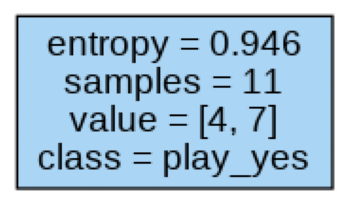

In [21]:
from sklearn.tree import export_graphviz
export_graphviz(clf_entropy,out_file='tree_entropy.dot',feature_names=['outlook','temperature','humidity','wind'],
class_names=['play_no','play_yes'],
filled=True)

# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree_entropy.dot', '-o', 'tree_entropy.png','Gdpi=600'])

# Display in python
import matplotlib.pyplot as plt
# plt.figure(figsize = (10, 10))
plt.imshow(plt.imread('tree_entropy.png'))
plt.axis('off');

# Decision tree classifiction using Gini Index

In [31]:
#Create a Decision Tree Classifier (using Gini index)

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 46, max_depth = 3, min_samples_leaf = 46)

# Train the model using the training sets

clf_gini.fit(inputs_train, targets_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=46, random_state=46)

In [32]:
#Predict Output

target_pred = clf_gini.predict(inputs_test)
print("Predicted ouptut: \n", target_pred)

Predicted ouptut: 
 [1 1 1]


<br/><h2> <b> What will be the value of Play, if Outlook is ’Rainy’, Temperature is ’Mild’, Humidity =’Nor-
mal’, and Wind = ’False’?  </b> </h2><br/>

In [25]:
# Rainy => 1
# Mild => 2
# Normal => 1
# False => 0

p = clf_gini.predict([[1, 2, 1, 0]])
print("Predicted class: ", p)

Predicted class:  [1]


<br/><h2> <b> What will be the value of Play, if Outlook is ’Sunny’, Temeprature is ’Cool’, Humidity
=’High’, and Wind = ’True’?  </b> </h2><br/>

In [27]:
# sunny => 2
# Cool => 0
# High => 0
# True => 1

p = clf_gini.predict([[2, 0, 0, 1]])
print("Predicted class: ", p)

Predicted class:  [1]


<br/><h2> <b> Calculate accuracy, precision, and recall. </b> </h2><br/>

In [33]:
from sklearn import metrics
print("Accuracy: ", metrics.accuracy_score(targets_test, target_pred))

print("\n\nPrecision: ", metrics.precision_score(targets_test, target_pred, average = 'binary'))

print("\n\nRecall: ", metrics.recall_score(targets_test, target_pred, average = 'binary'))

Accuracy:  0.6666666666666666


Precision:  0.6666666666666666


Recall:  1.0


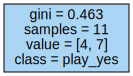

In [34]:
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                                feature_names=["Outlook", "Temperature", "Humidity", "Wind"],  
                                class_names=['play_no','play_yes'], filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph